# Project: Investigate TMDb movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li> <a href="#q1">Question 1</a> </li>
        <li> <a href="#q2">Question 2</a> </li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this dataset, I am going to investigating a TMDb movies database file which has 10k+ movies with its details of budget, revenue, release dates, etc.

### Questions to be answered from this analysis

* Which genres are most popular from year to year?
* What kinds of properties are associated with movies that have high revenues?
    * Find averages sperately for duration of movies, Budget, revenue, profits
    * Which director directed most profitable films?
    * Which cast has appeared the most profiltable films?
    * Which month released highest number of profitable movies in all of the years?
-----

Let's import the movie csv file and we will start analyze.

In [1]:
# Importing all the nescessory libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Store the database of tmdb movies into a movie_df dataframe variable
movie_df = pd.read_csv('tmdb-movies.csv')

movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We have to know minimum and maximum years of movies from the dataset

In [2]:
# Lowest year in the dataset
min_year = movie_df['release_year'].min()
# Latest year in the dataset
max_year = movie_df['release_year'].max()

# Print the year range
print(min_year, max_year)

(1960, 2015)


### About the TMDb dataset

* The dataset contains movies data which was released from 1960 to 2015. 

* It has movie related details like movie name, directors, cast, release dates and so on.

* The details of **budget**, **revenue**, **budget_adj**, **revenue_adj** are not given in the currency type. But assume that the data is in US dollars.

* It has **vote_count** and **vote_average**. The *vote_count* for each movies are not similar. The movie *Inception* has *9767* votes while *The Company* movie has only *12* votes. So, the votes are varying so much for each movies because of that we should not use the *vote_average* to assume that movies with highest votes/rating was more successful.

# Data Wrangling and Cleaning

<a id='cleaning'></a>
## Data Cleaning

Analyze and clean the TMDb movie data before wrangling the dataset.

First, lets clean up the columns.

Columns to delete -  `id, imdb_id, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.`

* For answering our questings we don't need the homepage details, keywords, overview of the movie, production_companies.
* And we already explain vote_count and vote_average is a reliable source for our analysis.


In [3]:
rows, col = movie_df.shape

# since 'rows' includes count of a header, we need to remove its count.
print('Total number of movies(row) - {} \nTotal number of features(column) {}'.format(rows-1, col))

Total number of movies(row) - 10865 
Total number of features(column) 21


In [4]:
# List of columns that needs to be deleted in our dataset
del_col = [ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

# Deleting the columns from the dataset
movie_df = movie_df.drop(del_col, 1)

movie_df.head(3)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


Now our dataset has only needed feature for analysis.

Next, clean the duplicate rows.

In [5]:
# Drop duplicate rows but keep the first one
movie_df.drop_duplicates(keep = 'first', inplace = True)

rows, col = movie_df.shape
print('After Cleaning \n\tTotal number of movies(row) - {} \n\tTotal number of feature(column) {}'.format(rows-1, col))

After Cleaning 
	Total number of movies(row) - 10864 
	Total number of feature(column) 11


So, now we have removed one duplicate copy of a movie. We have 10864 movie entries.

In that dataset, we saw some movies has **0** in their __budge__ and __revenue__. We need to delete those data as well.

In [6]:
# Checking zero values for which movies has 0 in budget and revenue column
check_zero = ['budget', 'revenue']

# First we need to replace the value '0' to NaN
movie_df[check_zero] = movie_df[check_zero].replace(0, np.NaN)

# Then we will drop any row which has NaN values (check_zero) 
movie_df.dropna(subset = check_zero, inplace = True)

rows, col = movie_df.shape
print('After cleaning,\n\tTotal number of movies(row) {}'.format(rows-1))

After cleaning,
	Total number of movies(row) 3853


After cleaning the dataset we reduced the movies from **10865** rows to **3853** rows and features from **21** columns to **10** columns.

Now as we completed the cleaning process for the dataset.

-----

<a id='wrangling'></a>
## Data Wrangling

We need to check cleanliness of dataset. First we need to check that all our dataset columns are in proper format for analyze.

In [7]:
# Check types of all columns
movie_df.dtypes

popularity        float64
budget            float64
revenue           float64
original_title     object
cast               object
director           object
tagline            object
runtime             int64
genres             object
release_date       object
release_year        int64
dtype: object

From the above information, 
* The **release_date** is a object type, but it should be datetime type. 
* The **budge** and **revenue** are in float64 but we need as int64 for calulation and analysis.

First convert those columns into proper format

In [8]:
# Convert release_date into datetime
# Change the column into datetime and then store that in the same column
movie_df.release_date = pd.to_datetime(movie_df['release_date'])

# Checking the dataset
movie_df.head(2)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [9]:
# convert budget and revenue from float64 into int64
# Use applymap function to change the columns data type
change_coltype = ['budget', 'revenue']
movie_df[change_coltype] = movie_df[change_coltype].applymap(np.int64)

# Checking the dataset
movie_df.head(2)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


When we look into the dataset we found some movies has **0** value in **runtime** column. We need to changes from **0** to **NaN**

In [10]:
# In runtime column replace 0 with NaN
movie_df['runtime'] = movie_df['runtime'].replace(0, np.NaN)

All done, once again we need to chaeck our dataset's types.

In [11]:
movie_df.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

We need to create one important column for our analysis is **profit** for each movies. 

In [12]:
# Insert a column and find profit for each movies by subtracting revenue-budge.
movie_df.insert(3, 'profit', movie_df['revenue'] - movie_df['budget'])

# The profit column should be in type int64
movie_df['profit'] = movie_df['profit'].apply(np.int64)

# showing the dataset
movie_df.head(2)

,popularity,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


**Before start exploration we need to save the trimmed and cleaned dataset into a new csv file**.

In [13]:
# save the wrangled dataset into new csv file
movie_df.to_csv('cleaned_movie_dataset.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

Import our new cleaned dataset csv file

In [14]:
movie_dataset = pd.read_csv('cleaned_movie_dataset.csv')

movie_dataset.head()

,popularity,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


<a id='q1'></a>
# 1. Which genres are most popular from year to year? 

Here we are going find answer for popularity of genres each year. We have to change our dataset into year basis. Then we have to find the popularity in genres each year.

First we need to find how many genres are there in this dataset. In the genre column, it has multiple values separated with "**|**" symbol. So We have to find unique genres from all of the values. Pandas __unique()__ function will not work for this. So i used python list and basic for loop to find its unique value.

In [15]:
# get list of genres
genre_details = list(movie_dataset['genres'])

genres_array = [];
for genres in genre_details:
    genres_array.append(list(genres.split('|')))


In [16]:
# Get all unique genre names
def get_unique_genres():
    unique_genres = []
    for genres in genres_array:
        for genre in genres:
            if genre not in unique_genres:
                unique_genres.append(genre)
    return unique_genres

In [17]:
unique_genres = get_unique_genres()
print(unique_genres)

print "\nTotal number of genres available in this movie database - {}".format(len(unique_genres))

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'Foreign', 'TV Movie']

Total number of genres available in this movie database - 20


So, there are 20 genres types. And some movies don't have genres information like **Goldeneye**.

We already know our dataset contains movies from year 1960 to 2015. So, now are going to create a dataframe year range.

First i need to create a new Dataframe which contains all years as column, and genre as rows.

In [18]:
# Creating a dataframe with unique_genres as index and years as columns
year_range = range(min_year, max_year + 1)
genres_df = pd.DataFrame(index = unique_genres, 
                         columns = year_range)

# Fill not assigned values to 0
genres_df = genres_df.fillna(value = 0)
print (genres_df.head(1))

        1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  ...   \
Action     0     0     0     0     0     0     0     0     0     0  ...    

        2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  
Action     0     0     0     0     0     0     0     0     0     0  

[1 rows x 56 columns]


Increment the value of genre in the correspoding year

In [19]:
# list of years of each movie
years = np.array(movie_dataset['release_year'])

# index to access year value
index = 0
for genres in genres_array:
    for genre in genres:
        # Add genre count by year
        genres_df.loc[genre, years[index]] = genres_df.loc[genre, years[index]] + 1  
    index+=1
    
print index - 1
genres_df

3853


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,2,2,2,2,1,2,2,3,2,1,...,38,40,52,41,52,58,41,49,44,37
Adventure,1,2,3,2,1,2,2,5,3,2,...,33,24,40,34,31,32,25,33,29,34
Science Fiction,0,0,0,0,0,0,1,0,3,0,...,13,13,26,31,16,23,23,20,23,22
Thriller,1,0,1,3,2,1,1,3,1,1,...,52,54,52,54,54,63,55,53,41,47
Fantasy,0,0,0,0,1,0,0,1,0,0,...,18,20,18,19,21,19,15,16,14,13
Crime,0,1,1,0,1,0,0,4,1,1,...,27,36,27,22,27,25,24,34,17,24
Western,1,1,2,0,0,0,1,0,1,2,...,1,2,1,0,3,2,1,2,1,2
Drama,3,6,5,3,4,3,2,7,6,2,...,89,75,81,83,84,89,66,80,79,81
Family,0,2,0,0,2,1,0,2,1,0,...,26,18,20,24,22,24,12,19,14,13
Animation,0,1,0,0,0,0,0,1,0,0,...,12,9,11,12,10,14,11,14,10,9


So, we created a dataframe which contains number of genres by year.

Now we have to create a pie chart which portrays the count of movies released in each genre over the years.

The top 12 genres are displayed and the remaining genres are displayed under the label others. For creating the pie chart we need genres counts.

In [20]:
# Number of movies in each genre so far.
def getAllGenresCount():
    genre_hash = {}
    for genres in genres_array:
        for genre in genres:
            if genre_hash.get(genre):
                genre_hash[genre] = genre_hash[genre] + 1
            else:
                genre_hash[genre] = 1
    return genre_hash

In [21]:
genre_counts = getAllGenresCount()

# Create a pandas series for the movie count hash
genre_series = pd.Series(genre_counts)

# Sort the values for top 12
genre_series = genre_series.sort_values(ascending = False)
genre_series

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

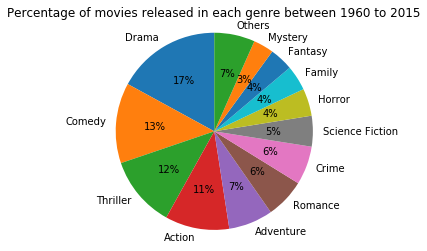

In [22]:
# Generate pie chart for top genre
number_of_genre_to_show = 12
genres_x = genre_series[0 : number_of_genre_to_show]

# Get label to show the pi chart
genre_label = list(genres_x.keys())
genre_label.append('Others')

# Get total number of movies count for Others category.
sum = 0
for i in genre_series[number_of_genre_to_show : ]:
    sum += i
genres_x['sum'] = sum

# draw the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(genres_x,labels = genre_label, autopct = '%1.f%%', startangle = 90)
ax1.axis('equal')
plt.title("Percentage of movies released in each genre between 1960 to 2015")
plt.show()

So, from the above chart we can interpret that most of movies released were in Drama followed by Comedy and thriller and so on. 

Therefore Drama is higher than the other genres. The plot depicts the top twelve genres and others depicts the count of movies in the remaining genres.

Next, we have to create another dataframe to hold popularity value of the movie according to genres by years.

In [23]:
# Create a new dataframe with genre as row and years as columns to get a count of popularity
popularity_df = pd.DataFrame(index = unique_genres, 
                             columns = range(min_year, max_year + 1))

# fill it with zero value
popularity_df = popularity_df.fillna(value = 0.0)
print(popularity_df.head())

                 1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  \
Action            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Adventure         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Science Fiction   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Thriller          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Fantasy           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                 ...   2006  2007  2008  2009  2010  2011  2012  2013  2014  \
Action           ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Adventure        ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Science Fiction  ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Thriller         ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Fantasy          ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                 2015  
Action            0.0  
Ad

An numpy array is created for the popularity details and it is checked for empty/zero values to see whether there is any unavalability of popularity in the dataset.

In [24]:
# create a numpy array which holds popularity details
popularity = np.array(movie_dataset['popularity'])

# Check whether any popularity is zero.
print (len(popularity[popularity==0]))

0


The output 0 shows all the movie data has popularity value

In [25]:
# Index to access year location
z = 0
for genres in genres_array:
    for genre in genres:
            popularity_df.loc[genre, years[z]] = popularity_df.loc[genre, years[z]] + popularity[z]
    z+=1
popularity_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,3.009075,0.928279,3.696759,2.715396,3.153791,2.532622,0.695579,4.015400,1.356276,1.778746,...,45.214271,49.787810,71.755938,70.883424,79.429903,92.110903,87.006893,93.236770,176.235917,200.267831
Adventure,1.872132,3.386535,4.865526,3.172561,3.153791,2.532622,0.507168,6.807387,5.031555,2.394635,...,42.210460,37.756058,52.488010,66.043675,67.552506,59.577266,62.935832,73.913796,148.341227,199.382091
Science Fiction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.207257,0.000000,4.507375,0.000000,...,16.884195,15.428433,29.513268,55.745086,29.285751,43.341604,40.382077,57.654333,126.101965,167.082032
Thriller,2.610362,0.000000,3.170651,4.092655,3.817237,1.910465,0.402730,2.569521,0.786854,1.778746,...,57.165286,62.800272,61.675756,66.378336,70.205726,83.599347,73.186281,77.372798,116.791205,183.929619
Fantasy,0.000000,0.000000,0.000000,0.000000,1.987819,0.000000,0.000000,0.241283,0.000000,0.000000,...,26.712414,35.191101,26.085987,37.426758,36.763215,37.566325,37.832559,32.236092,55.176084,43.241109
Crime,0.000000,0.900245,0.810805,0.000000,0.663446,0.000000,0.000000,2.715840,0.786854,1.357317,...,25.523123,32.087640,36.583606,16.239235,26.558540,34.648336,33.753904,47.915296,34.454964,69.647798
Western,1.872132,0.173731,1.033186,0.000000,0.000000,0.000000,0.395668,0.000000,0.621202,1.973206,...,0.463068,1.804135,0.646244,0.000000,3.374361,3.139365,5.944518,1.602102,0.870104,15.009100
Drama,4.694612,4.518134,3.206667,1.676020,3.690725,2.741762,0.970185,5.478296,3.137832,2.217123,...,72.886690,66.947229,74.019136,77.922543,75.357280,83.008665,87.219776,97.530711,164.252847,165.348458
Family,0.000000,2.935770,0.000000,0.000000,2.621701,1.313676,0.000000,2.791987,0.633129,0.000000,...,31.672347,28.429192,27.189187,36.246911,39.778978,33.055324,19.316146,29.330542,33.520186,43.861123
Animation,0.000000,2.631987,0.000000,0.000000,0.000000,0.000000,0.000000,2.550704,0.000000,0.000000,...,18.447325,13.594778,16.577006,24.137930,18.502974,18.959523,18.676666,23.813636,27.173109,28.528160


I use a function to standardize the data of values in the popularity dataframe so that the data does not contain any discrepancies and is depicted as the number of standard deviations it is away from the mean. 

Positive value indicates the movie is popular.
 The negative values indicates the movie is unpopular or less popular comparatively. 
 And the mean value acts as the line of seperation for identifying the popular movies.

In [26]:
# Standardize the popularity of values in dataframe. (std for index)
def std_popularity(p):
    p_std = (p - p.mean()) / p.std(ddof = 0)
    return p_std

popularity_std = std_popularity(popularity_df)
popularity_std

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,1.516941,-0.195604,1.850915,1.485508,0.973797,1.612008,1.769465,1.051124,0.063770,1.258583,...,0.989701,1.245898,1.886797,1.502918,1.828037,1.924321,1.955548,1.874181,2.071588,1.851947
Adventure,0.662499,1.385628,2.640234,1.866965,0.973797,1.612008,1.084220,2.384721,2.236525,1.940996,...,0.851627,0.657951,1.094146,1.323130,1.390317,0.873339,1.125331,1.267238,1.590798,1.839555
Science Fiction,-0.744457,-0.792705,-0.645666,-0.780206,-0.954579,-0.813665,-0.006546,-0.866838,1.926640,-0.712291,...,-0.312527,-0.433117,0.149002,0.940556,-0.019935,0.348855,0.347445,0.756521,1.207484,1.387663
Thriller,1.217298,-0.792705,1.495611,2.634687,1.379459,1.016124,0.704383,0.360498,-0.272861,1.258583,...,1.539044,1.881768,1.472115,1.335562,1.488097,1.649360,1.478871,1.375887,1.047005,1.623368
Fantasy,-0.744457,-0.792705,-0.645666,-0.780206,0.260867,-0.813665,-0.760334,-0.751589,-0.738034,-0.712291,...,0.139240,0.532611,0.008009,0.260064,0.255633,0.162288,0.259512,-0.041877,-0.014987,-0.344930
Crime,-0.744457,-0.213637,-0.098095,-0.780206,-0.548917,-0.813665,-0.760334,0.430387,-0.272861,0.791634,...,0.084572,0.380956,0.439864,-0.527014,-0.120441,0.068024,0.118838,0.450614,-0.372134,0.024512
Western,0.662499,-0.680955,0.052089,-0.780206,-0.954579,-0.813665,0.678698,-0.866838,-0.370792,1.474047,...,-1.067345,-1.098885,-1.038540,-1.130272,-0.974852,-0.949856,-0.840315,-1.004104,-0.950999,-0.739909
Drama,2.783666,2.113511,1.519935,0.618257,1.302104,1.812317,2.768199,1.749879,1.116992,1.744311,...,2.261699,2.084414,1.979901,1.764408,1.677948,1.630278,1.962890,2.009056,1.865049,1.363409
Family,-0.744457,1.095681,-0.645666,-0.780206,0.648452,0.444537,-0.760334,0.466759,-0.363740,-0.712291,...,0.367229,0.202182,0.053393,0.216234,0.366774,0.016563,-0.379124,-0.133142,-0.388246,-0.336255
Animation,-0.744457,0.900278,-0.645666,-0.780206,-0.954579,-0.813665,-0.760334,0.351510,-0.738034,-0.712291,...,-0.240676,-0.522721,-0.383175,-0.233592,-0.417315,-0.438795,-0.401180,-0.306430,-0.497643,-0.550771


Next, we are going to create a series for most popular genre for every year.

Then from the dataframe which contains the standardized popularity values, we find the maximum value for each column and it is assume as the most popular genre for that particular year and it is added to the Series.

In [27]:
# Creating a series to hold the popular genre for every year.
year_range = range(min_year, max_year + 1)
pop_genre = pd.Series(index = year_range)
pop_genre.head()

# to identify the genre with maximum standardized popularity value
for year in year_range:
    pop_genre[year] = popularity_std[year].idxmax()
pop_genre

1960              Drama
1961             Comedy
1962          Adventure
1963           Thriller
1964             Comedy
1965              Drama
1966              Drama
1967          Adventure
1968            Mystery
1969          Adventure
1970             Comedy
1971    Science Fiction
1972              Drama
1973              Drama
1974              Drama
1975              Drama
1976              Drama
1977          Adventure
1978             Horror
1979    Science Fiction
1980             Action
1981          Adventure
1982    Science Fiction
1983             Action
1984             Action
1985          Adventure
1986              Drama
1987             Comedy
1988             Comedy
1989             Comedy
1990              Drama
1991             Action
1992           Thriller
1993              Drama
1994              Drama
1995              Drama
1996              Drama
1997           Thriller
1998              Drama
1999              Drama
2000             Comedy
2001            

From the output we can see that the Drama is the most popular genre for most of the years. 

And the below graph is the changes in the popularity levels for the "Drama" genre is depicted over the years.

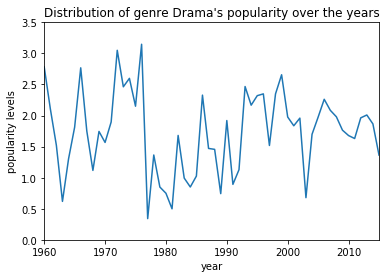

In [28]:
# to plot a histogram of genre 'Drama'.
def draw_distribution(genre_name):
    plt.plot(popularity_std.loc[genre_name])
    plt.xlabel('year')
    plt.ylabel('popularity levels')
    plt.title("Distribution of genre {}'s popularity over the years".format(genre_name))
    plt.axis([min_year, max_year, 0, 3.5])
    plt.show()

draw_distribution('Drama')

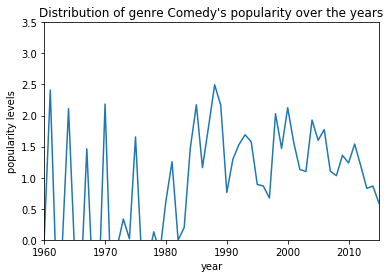

In [29]:
draw_distribution('Comedy')

From the above Drama graph we can see the rise and fall over the years. There are steep rises and falls in the popularity levels of the genre. 

The mean of the distribution above lies between 1980 t0 1990 since there steep rises and falls on both the ends so the mean almost has to be in the middle. From the graph we can also infer that the standarnd deviation is almost 0.5.

<a id='q2'></a>
# 2. What kinds of properties are associated with movies that have high revenues? 

To find good properties for high revenue movies, first filter out less revenue and loss movies. 

First of all we are going to analyze movies which made good number of revenue. So, we need to filter out the dataset only have the data of movies that made profits, not loss. Also we don't need the movies which just made profit by some dollars rather we need movies who made significant profits, then only we can come up with similar characteristics of high revenu movies.

In [30]:
movie_dataset = pd.read_csv('cleaned_movie_dataset.csv')

# First find mean of profit

movie_dataset['profit'].mean()

70482919.14322782

In [31]:
# Find highest and lowest profit movie details
highest_id = movie_dataset['profit'].idxmax()
highest_details = pd.DataFrame(movie_dataset.loc[highest_id])
    
lowest_id = movie_dataset['profit'].idxmin()
lowest_details = pd.DataFrame(movie_dataset.loc[lowest_id])
    
    #concatenating two dataframes
high_low_movie = pd.concat([highest_details, lowest_details], axis = 1)
    
high_low_movie

,344,682
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


Mean of profit is 70 million dollar. So, lets take somewhere around 30M to 50M for starting point of our analyzing data. We are going to select **40M+ dollar**.

In [32]:
#assinging new dataframe which holds values only of movies having profit $50M or more
profit_movie_data = movie_dataset[movie_dataset['profit'] >= 40000000]

#reindexing new dataframe
profit_movie_data.index = range(len(profit_movie_data))
#will initialize dataframe from 1 instead of 0
profit_movie_data.index = profit_movie_data.index + 1

#showing the dataset
profit_movie_data.head(2)

,popularity,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [33]:
print "We filtered data from {} to {}".format(movie_dataset.shape[0], len(profit_movie_data))

We filtered data from 3854 to 1493


So, based on the output we conclude that 2361 movies are made less than 40M dollar revenue.

In [34]:
# Average of Budget, revenue, profit
print "Average Budget - {}".format(profit_movie_data['budget'].mean())

print "Average Revenue - {}".format(profit_movie_data['revenue'].mean())

print "Average Profit - {}".format(profit_movie_data['profit'].mean())

Average Budget - 57308877.0831
Average Revenue - 236306323.374
Average Profit - 178997446.291


In our **\$40M+** range data, the average _Budget_ is around **\$58M**,
_Revenus_ is around **\$236M** 
and _Profit_ is around **\$179M**.

Now, we are going to analyze and get count of director, cast, genre data. These data has seprator `|` in its values. So we have to split those data and get count of that. for these steps we are going to create function for all these there properties.

In [35]:
def separate_and_get_count(column_name):
    # Get profit_movie_data column, and separate the string by '|'
    all_data = profit_movie_data[column_name].str.cat(sep = '|')
    
    # Create a pandas series
    unique_series = pd.Series(all_data.split('|'))
    
    # Descending order of the series
    count = unique_series.value_counts(ascending=False)
    return count

In [36]:
# Get directors movie count
director_movies_count = separate_and_get_count('director')

# Shwoing top 10 values
director_movies_count.head(10)

Steven Spielberg      24
Clint Eastwood        15
Robert Zemeckis       13
Tim Burton            12
Ridley Scott          12
Ron Howard            10
Tony Scott            10
Michael Bay            9
Joel Schumacher        8
M. Night Shyamalan     8
dtype: int64

Wow!! 'Steven Spielberg' takes the momentum! Directing 24 movies over $40M+ in profit is not a easy job!

Also the other directors such as 'Clint Eastwood', 'Robert Zemeckis', 'Tim Burton' prove to be really great directors. Movies directed by these directors is more likely to make huge profits, and probability for a movie to go for success is higher! 

Since we don't really know how many movies the directors directed in total in their lifetime, we can't say for sure that movies directed by above directors will always earn profits.

In [37]:
# Get each cast's movies count
cast_count = separate_and_get_count('cast')

# Shwoing top 10 values
cast_count.head(10)

Tom Cruise            27
Tom Hanks             26
Brad Pitt             25
Cameron Diaz          22
Robert De Niro        21
Sylvester Stallone    21
Bruce Willis          21
Denzel Washington     20
Jim Carrey            20
Matt Damon            20
dtype: int64

Wow! **Tome Cruise** takes the momentum for cast catagory for appearing the most profitable movies more than $40M.

Other actors well deserved it **Tom Hanks**, **Brad Pitt**, **Cameron Diaz**! Directors hiring these actors will have higher probability of making high profits also this doesn't mean that actors other than these acting in a film will make less profit. Because of they are having huge fanbase, the audience is attracted to the movies more than other actors. This would affect the revenue of the movie but not all the time. Ultimately it comes down to storyline and other influential factors. 

By looking at this dataset we can atleast say that these actors acting in a film that has the higher probability of earning high profits!

Same as we said for the directors, we don't really know how many movies these actor acted movies in there lifetime, and we cannot be sure these actors movies make huge profits always.

In [38]:
# Get movies count by genres
genre_count = separate_and_get_count('genres')

# Shwoing top 10 values
genre_count.head(10)

Drama              554
Comedy             542
Action             505
Thriller           454
Adventure          402
Romance            244
Family             242
Crime              227
Science Fiction    219
Fantasy            212
dtype: int64

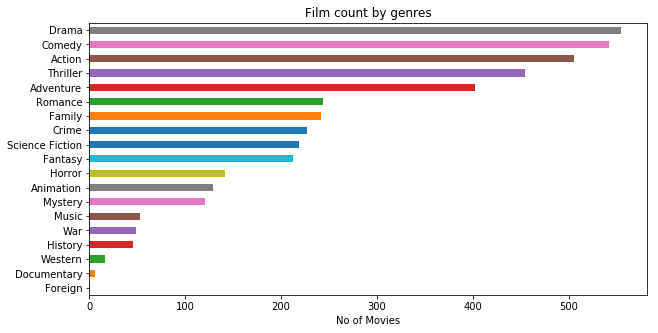

In [39]:
genre_count.sort_values(ascending = True, inplace = True)

# Initializing barizontal bar plot
ax = genre_count.plot.barh()

# Giving a title and x_label
ax.set(title = 'Film count by genres')
ax.set_xlabel('No of Movies')

# Giving the figure size(width, height)
ax.figure.set_size_inches(10, 5)
plt.show()

OMG! In our previous question **Drama** has more popularity year to year. That is same for the profitable category as well. Same as **Comedy**, **Action** has huge impact on the huge profit list.

**Western**, **war**, **history**, **music**, **documentary** and the most least **foreign** genres have less probability to make profit as in comparison to other genre.


Now we can see which month most profitable movies released. we need to see is summer and festival months has huge impact of movie profits?. Lets see.

In [40]:
def draw_horizontal_bar(df, title, x_label, y_label):
    month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    
    # Giving seaborn bar plot to visualize the data and set the size of the graph
    monthly_h_bar = sns.barplot(x = df.index, y = df['profit'], data = df)
    monthly_h_bar.figure.set_size_inches(15,8)

    # Set the title with fontsize 25, and x & y labels with color and fontsize
    monthly_h_bar.axes.set_title(title, color="y", fontsize = 25, alpha = 0.6)
    monthly_h_bar.set_xlabel(x_label, color="g", fontsize = 25)
    monthly_h_bar.set_ylabel(y_label, color="g", fontsize = 35)

    monthly_h_bar.tick_params(labelsize = 12, labelcolor="black")

    # x-axis values length is high, so to make it readable rotating the value and reduced the size.
    monthly_h_bar.set_xticklabels(month_list, rotation = 50, size = 14)

    plt.show()

In [41]:
profit_movie_data['release_date'] = pd.to_datetime(profit_movie_data['release_date'])

# For answering this question we need to group all the months of year and then calculate the profits
index_release_date = profit_movie_data.set_index('release_date')

# Now we need to group all the data by month, since release date is index, we can extract month from it
groupby_month = index_release_date.groupby([(index_release_date.index.month)])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


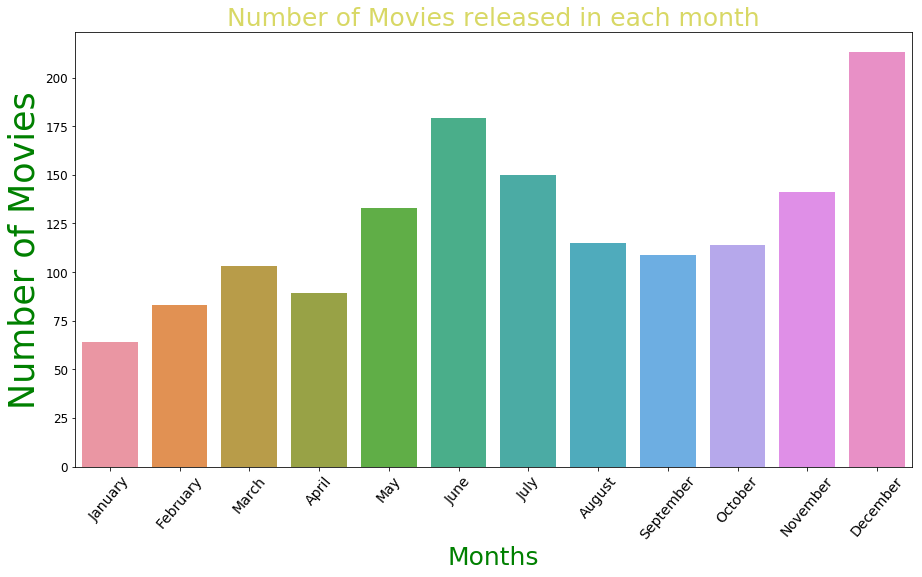

In [42]:
# Get profit movies count of each month and converting to a new dataframe
monthly_movie_count= pd.DataFrame(groupby_month['profit'].count())

draw_horizontal_bar(monthly_movie_count, 'Number of Movies released in each month', "Months", "Number of Movies");

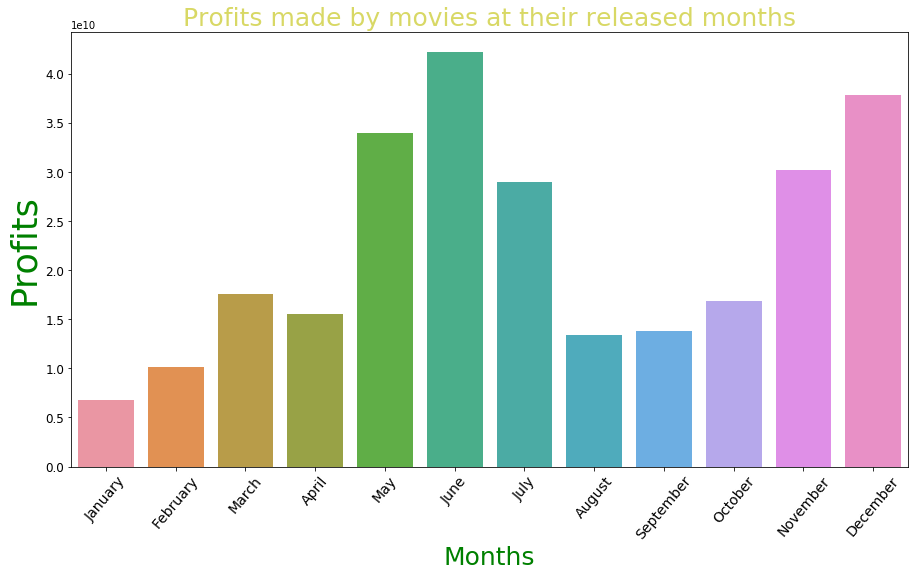

In [43]:
# Get total profit per month and converting to a new dataframe
monthly_profit = pd.DataFrame(groupby_month['profit'].sum())

draw_horizontal_bar(monthly_profit, 'Profits made by movies at their released months', "Months","Profits");

As per the visualization graph our guess was almost right, the summer time(may, june) and festival time(December - Christmas) has huge impact.

In movie release count december month got top place, but in profit it takes second place.
As we conclude the huge profits made in `June` month(summer month) as per the graph. June months release 175 movies which is second highest in release count but in the profits, it won the momentum.

Early, we calculated the highest and lowest profit movie list. As per the list the movie **Avatar**, which the highest profit movie released in December at the same the lowest profit movie also released in December month. But we are not guarantee that movie released in June and December will always collect huge profits/$40M+. It is just showing these month has higher chance, but we need to consider some other important factor as well such as story, cast, directors and so on.

------
Now we need to analayze multi variable exploration. We have to see what the correlation between two variables. 

Here we are going to see if profit is based on budget and popularity.

In [44]:
# Sort all values based on profit
data = movie_dataset.sort_values('profit', ascending=False)[:60]
data.head()

,popularity,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
344,9.432768,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,2009
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
1767,4.355219,200000000,1845034188,1645034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Nothing on Earth could come between them.,194,Drama|Romance|Thriller,1997-11-18,1997
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
4,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


First we have to find correlation value for popularity vs profit and budget vs profit. If any value hase negative then we cannot correlate.


In [45]:
# Find correlation variable between popularity and profit
print movie_dataset['popularity'].corr(movie_dataset['profit'])

# Find correlation variable between budget and profit
print movie_dataset['budget'].corr(movie_dataset['profit'])

0.5962013674920572
0.5268176539924018


It has positive correlation between budget, profit and popularity, profit. But it has low positive correlation.

In [46]:
def draw_scatter(x_var, title):
    plt.scatter(x=movie_dataset[x_var], y=movie_dataset.profit)
    plt.title(title)
    plt.xlabel(x_var)
    plt.ylabel("Profit")

In [47]:
data.corr()

,popularity,budget,revenue,profit,runtime,release_year
popularity,1.000000,0.093947,0.389163,0.389493,0.140416,0.128772
budget,0.093947,1.000000,0.349532,0.134486,0.355116,0.584923
revenue,0.389163,0.349532,1.000000,0.975420,0.236600,0.250614
profit,0.389493,0.134486,0.975420,1.000000,0.166716,0.127489
runtime,0.140416,0.355116,0.236600,0.166716,1.000000,-0.007874
release_year,0.128772,0.584923,0.250614,0.127489,-0.007874,1.000000


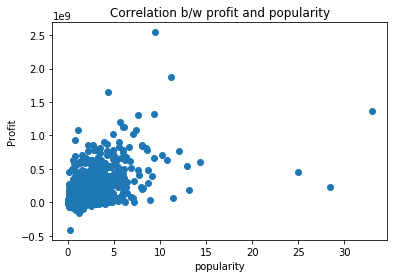

In [48]:
draw_scatter('popularity', "Correlation b/w profit and popularity")

Ok, from the above graph we can conclude that the popularity does not leads to high profit. Correlation Is Not Causation is correct for this properties. We cannot sure to say that if popularity increases the profit increases or not.

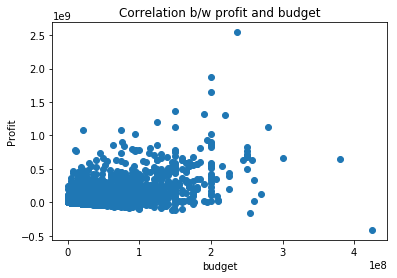

In [49]:
draw_scatter('budget', "Correlation b/w profit and budget")

From the above graph we can conclude that only few movies profit increases if budget increases. But the correlation very very low percentage for those profited movies. So, the budget is a property to define the profit.

So, after these correleation checks, we can say that the popularity and budget will not leads to high profit.

<a id='conclusions'></a>
## Conclusions

The most popular genre in most of the years is **Drama**. The data gives a list of the most popular genres from 1960 to 2015. Drama takes most of the years. So, for answering for the question is,
> **Drama, Comedy, Action** genres are most popular from year to year.

The properties associated with huge profit movies are directors, cast, genre, release month.
So, if you have plan to produce a movie then i can say these things.

> **Hire director for your movie** - Steven Spielberg, Clint Eastwood, Robert Zemeckis, Tim Burton, Ridley Scott.

> **Hire cast for your movie** - Tom Cruise, Tom Hanks, Brad Pitt, Cameron Diaz, Robert De Niro.

> **Choose genre for your movie** - Drama, Comedy, Action, Thriller, Adventure.

> **Choose these release months** - June, December, May.

By doing all this, our probability of making a profitable movie would be higher and obviously we will take care of other influential factors as well such as story, screenplay and so on.

**Limitation**
This is a just a analysis result for the given dataset. Suppose if you start filming a movie based on these result, we cannot give guarantee or assurance that you will get huge profit.